In [10]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

data = pd.read_csv("Rainfall.csv")

data.columns = data.columns.str.strip().str.lower()

data['rainfall'] = data['rainfall'].str.strip().str.lower()
data['rainfall'] = data['rainfall'].map({'no': 0, 'yes': 1})
data = data.dropna(subset=['rainfall'])

numeric_data = data.select_dtypes(include=['int64', 'float64'])
corr = numeric_data.corr()['rainfall'].sort_values(ascending=False)
print(corr)


rainfall         1.000000
cloud            0.625766
humidity         0.489623
windspeed        0.154488
dewpoint         0.139916
day              0.010339
mintemp         -0.007697
winddirection   -0.013214
temparature     -0.037360
pressure        -0.089275
maxtemp         -0.101003
sunshine        -0.552519
Name: rainfall, dtype: float64


WE SELECT ONLY NECESSAERY AND RELEVANT FEATURES BASED ON CORRELATION

In [ ]:
features = ['cloud', 'humidity', 'sunshine', 'windspeed', 'dewpoint']
target = 'rainfall'

X = data[features]
y = data[target]

X = X.apply(pd.to_numeric, errors='coerce')
X = X.fillna(X.mean())

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y         # Equally distribute data in train and test sets
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

new_data = pd.DataFrame(
    [[5.0, 80.0, 6.0, 15.0, 18.0]],
    columns=features
)

new_data_scaled = scaler.transform(new_data)

prediction = model.predict(new_data_scaled)
probability = model.predict_proba(new_data_scaled)

print("Prediction:", prediction[0])
print("Probability of Rain:", round(probability[0][1], 2))


Accuracy: 0.8648648648648649
              precision    recall  f1-score   support

           0       0.85      0.71      0.77        24
           1       0.87      0.94      0.90        50

    accuracy                           0.86        74
   macro avg       0.86      0.82      0.84        74
weighted avg       0.86      0.86      0.86        74

[[17  7]
 [ 3 47]]
Prediction: 0
Probability of Rain: 0.07


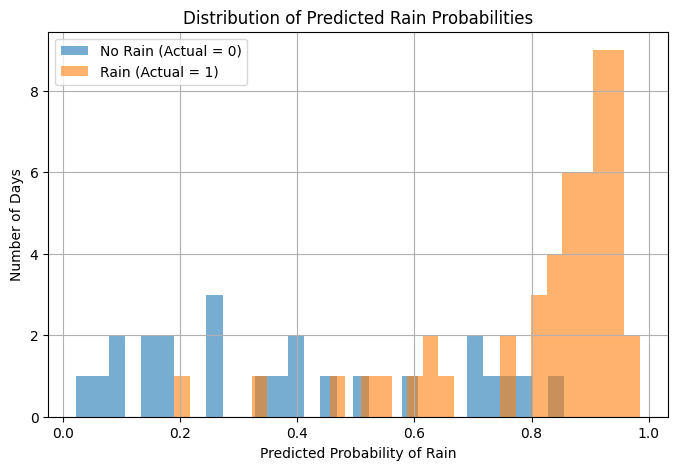

In [15]:
plt.figure(figsize=(8, 5))

# Predicted probabilities grouped by actual class
plt.hist(y_pred_prob[y_test == 0], bins=30, alpha=0.6, label='No Rain (Actual = 0)')
plt.hist(y_pred_prob[y_test == 1], bins=30, alpha=0.6, label='Rain (Actual = 1)')

plt.xlabel("Predicted Probability of Rain")
plt.ylabel("Number of Days")
plt.title("Distribution of Predicted Rain Probabilities")
plt.legend()
plt.grid(True)
plt.show()

The histogram shows a clear separation between predicted rain probabilities for rain and no-rain days. Most non-rain days have low predicted probabilities, while rain days cluster near high probabilities, indicating good model calibration. Overlap occurs mainly in borderline weather conditions